<a href="https://colab.research.google.com/github/laprass/drive/blob/main/%5Bn211a%5D_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

# pd.set_option('display.max.column',None)
# pd.set_option('display.max.row',None)

In [ ]:
df = df.drop(['id','date'], axis=1)

In [ ]:
# df = StandardScaler().fit_transform(df0)

In [ ]:
# df = pd.DataFrame(df, columns = df0.columns)
# df

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [ ]:
# searching a maximum correlation.

df_cor = df.corr()
df_cor_price = df_cor['price']
price = df_cor_price.sort_values(ascending = False)
price

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

**주택가격과 가장 상관계수가 높은 특성은 'sqft_living'**

In [ ]:
print('Highest Feature = sqft_living, corr_value = {}'.format(round(price[1],3)))

Highest Feature = sqft_living, corr_value = 0.702


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

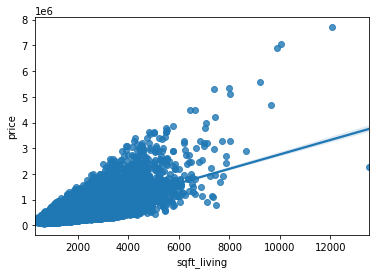

In [ ]:
# visualize

sns.regplot(x = df['sqft_living'], y = df['price'])

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

In [ ]:
# price data stats

df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
mean = df['price'].mean()
error = mean - df['price']
mae = error.abs().mean()

In [ ]:
print('기준모델을 평균으로 설정했으므로 "기준모델의 값"은 "Price의 평균 = {}"'.format(round(mean)))

기준모델을 평균으로 설정했으므로 "기준모델의 값"은 "Price의 평균 = 540088"


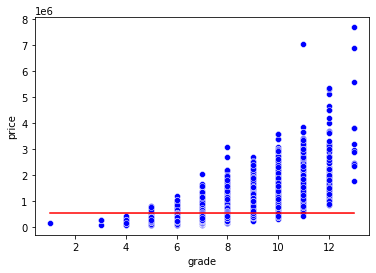

In [ ]:
# visualize

sns.lineplot(x = df['grade'], y = mean, color='red')
sns.scatterplot(x = df['grade'], y = df['price'], color='blue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [ ]:
# prediction model
model = LinearRegression()

# feature table / target vector
feature = ['grade']
target = ['price']

# feature = grade / target = price
x_grade_train = df[feature]
y_price_train = df[target]

# learning model
model.fit(x_grade_train, y_price_train)

LinearRegression()

In [ ]:
# price prediction by test data (grade = 6)

x_grade_test = [[6]]
y_price_pred = model.predict(x_grade_test)

print(f'{x_grade_test[0][0]} 등급(Grade)을 가지는 주택의 예상 가격은 ${int(y_price_pred)} 입니다.')

6 등급(Grade)을 가지는 주택의 예상 가격은 $194700 입니다.


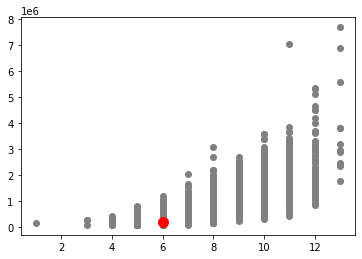

In [ ]:
# visualize

plt.scatter(x_grade_train, y_price_train, color='gray', linewidth=1)
plt.scatter(x_grade_test, y_price_pred, color='red', linewidth=5)

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
# model Coefficient

print('Coefficient with per Grade = {}"'.format(int(model.coef_[0][0])))

Coefficient with per Grade = 208457"


In [ ]:
from ipywidgets import interact

@interact
def grade_to_pedict(Grade = (df['grade'].min(),df['grade'].max())):
    z_pred = model.predict([[Grade]])
    pred = f"{Grade} 등급의 주택 예상 가격 = ${int(z_pred[0])} (등급당 상승폭: ${int(model.coef_[0])})"
    return pred

print('주택 등급이 "1등급" 올라갈때 "Coefficient 정도의 금액"도 "같이 상승"한다는 것을 알 수 있다.')

interactive(children=(IntSlider(value=7, description='Grade', max=13, min=1), Output()), _dom_classes=('widget…

주택 등급이 "1등급" 올라갈때 "Coefficient 정도의 금액"도 "같이 상승"한다는 것을 알 수 있다.


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
# prediction model
sl_model = LinearRegression()

# feature table / target vector
sl_f = ['sqft_living']
sl_t = ['price']

# feature = grade / target = price
x_train = df[sl_f]
y_train = df[sl_t]

# learning model
sl_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# sqft_living Coefficient

print('Coefficient with per sqft_living = {}"'.format(int(sl_model.coef_[0][0])))

Coefficient with per sqft_living = 280"


In [ ]:
@interact
def living_to_pedict( sqft_living = (df['sqft_living'].min(),df['sqft_living'].max())):
    f_pred = sl_model.predict([[sqft_living]])
    pred = f"{sqft_living} SQFT 면적의 주택 예상 가격 = ${int(f_pred[0])} (면적당 상승폭: ${int(sl_model.coef_[0])})"
    return pred

print('스퀘어피트당 "Coefficient 정도의 금액"이 "같이 상승"한다.')

interactive(children=(IntSlider(value=6915, description='sqft_living', max=13540, min=290), Output()), _dom_cl…

스퀘어피트당 "Coefficient 정도의 금액"이 "같이 상승"한다.


In [ ]:
## Grade modeling evaluation by MAE

from sklearn.metrics import mean_absolute_error
grade_mae = mean_absolute_error(x_grade_train, y_price_train)
print('Grade를 활용한 모델링의 오류 크기 =  ${}'.format(int(grade_mae)))

Grade를 활용한 모델링의 오류 크기 =  $540080


In [ ]:
## sqft_living modeling evaluation by MAE

from sklearn.metrics import mean_absolute_error
sqft_mae = mean_absolute_error(x_train, y_train)
print('스퀘어피트를 활용한 모델링의 오류 크기 =  ${}'.format(int(sqft_mae)))

스퀘어피트를 활용한 모델링의 오류 크기 =  $538008


In [ ]:
print('스퀘어피트 모델링의 오류 ${}  <  등급활용 모델링의 오류 ${}'.format(int(sqft_mae),int(grade_mae)))
print('즉, 오류 값이 더 작은 스퀘어피트 모델링이 근소하게 우위에 있다고 평가할 수 있다.')

스퀘어피트 모델링의 오류 $538008  <  등급활용 모델링의 오류 $540080
즉, 오류 값이 더 작은 스퀘어피트 모델링이 근소하게 우위에 있다고 평가할 수 있다.


## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

### A6) how select good feature for creating simple regression model

첫번째는 도메인 지식을 활용하여 특성을 선택하거나 변형할 수 있겠다.

예를 들어 금융업에서 종사한 사람은 주가와 순이익이 주어진 데이터에서

EPS(주당순이익) 데이터를 생성하여 모델링에 적합한 특성으로 사용할 수 있다. 


두번째는 Filter 또는 Wrapper method 같은 방법으로 일일이 특성을 대입해보는 것이다.

조합을 바꿔가면서 가장 모델링에 성능이 좋은 조합을 찾아낼 수 있다.


세번째는 기존의 독립변수로부터 완전히 새로운 변수를 추출하는 방법이다.

대표적으로 주성분분석 같은 차원축소법으로

많은 복수의 독립변수들을 손실 없이 단순선형회귀분석을 가능하게 만드는 방법이다.

하지만 이 경우 기존 독립변수들 간에 유의한 상관관계를 요구하며

새로운 변수로 정의되었기 때문에, 원래의 각 독립변수가 어떤 영향을 미치는지 추론하기가 어려워진다.

### A7) Ordinary Least Squares Method

산점도로 데이터를 시각화했다면, 각 데이터가 위치한 지점의 추세선을 나타내는 회귀선을 그릴 수 있다.

각 데이터가 회귀선에서 떨어진 격차를 잔차라고한다.

이 잔차를 그냥 합산한다면 +와 -가 상쇄되어 의미가 없어진다.

하지만 잔차를 제곱한다면 실제 데이터와 회귀선 사이의 차이를 직관적인 수치로 표현할 수 있고

이것이 해당 회귀선이 정확한지에 대한 검증에 활용 할 수 있다.